For this project, Im going to predict car prices using [this](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) Automobile Data Set, you can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/automobile). I am going to use KNN for this project

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars = pd.read_csv('imports-85.data')
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

Let's fix the column names first so it matches the documentation

In [3]:
fix_colnames = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv("imports-85.data", names=fix_colnames)
cars.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


## Data Cleaning

Since we are using KNN, I can only use numerical columns as the features. First, I have to fix rows that have the `?` values into NaN. After that, non numeric features will be dropped

In [4]:
cars = cars.replace('?', np.NaN)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

In [5]:
drop_columns = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", 
           "engine-type", "num-of-cylinders", "fuel-system", "engine-size"]

cars = cars.drop(drop_columns, axis = 1)
cars = cars.astype('float')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [6]:
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since we want to predict the price, there's no point in keeping rows with missing values on the price column. As for other columns, we will fill them with their respective means.

In [7]:
cars = cars.dropna(axis = 0, subset = ['price'])
cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
cars['normalized-losses'] = cars['normalized-losses'].fillna(cars['normalized-losses'].mean())
cars['bore'] = cars['bore'].fillna(cars['bore'].mean())
cars['stroke'] = cars['stroke'].fillna(cars['stroke'].mean())
cars['peak-rpm'] = cars['peak-rpm'].fillna(cars['peak-rpm'].mean())
cars['horsepower'] = cars['horsepower'].fillna(cars['horsepower'].mean())
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


## Features Normalization

Normalized the features into values between 0-1.

In [9]:
normalized_cars = (cars-cars.min())/(cars.max() - cars.min())
normalized_cars['price'] = cars['price']
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Applying KNN

In [10]:
def knn_model(dataset, features, target):
    
    knn = KNeighborsRegressor()
    
    np.random.seed(1)
    random_index = np.random.permutation(dataset.index)
    randomed_dataset = dataset.reindex(random_index)
    
    mid_idx = int(len(randomed_dataset) / 2)
    
    train_dataset = randomed_dataset[:mid_idx]
    test_dataset = randomed_dataset[mid_idx:]
    
    knn.fit(train_dataset[[features]], train_dataset[target])
    
    prediction = knn.predict(test_dataset[[features]])
    mse = mean_squared_error(test_dataset[target], prediction)
    rmse = mse**(0.5)
    
    return rmse

rmse_results = {}
feature_list = normalized_cars.columns.drop('price')

for feature in feature_list:
    rmse_results[feature] = knn_model(normalized_cars, feature, 'price')
    
rmse_list = pd.Series(rmse_results)
rmse_list.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

It seems the feature `horsepower` has the least amount of error. Next, I will try changing the K amount of the nearest neighbors the KNN model will use and see if that will improve the model's prediction.

In [11]:
def knn_model_2(dataset, features, target, num_neighbors):
        
    np.random.seed(1)
    random_index = np.random.permutation(dataset.index)
    randomed_dataset = dataset.reindex(random_index)
    
    mid_idx = int(len(randomed_dataset) / 2)
    
    train_dataset = randomed_dataset[:mid_idx]
    test_dataset = randomed_dataset[mid_idx:]
    
    rmse_k = {}
    
    for k in num_neighbors:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_dataset[[features]], train_dataset[target])
    
        prediction = knn.predict(test_dataset[[features]])
        mse = mean_squared_error(test_dataset[target], prediction)
        rmse = mse**(0.5)
        rmse_k[k] = rmse
    
    return rmse_k

k_n = [1,3,5,7,9]
rmse_k_results = {}
feature_list = normalized_cars.columns.drop('price')

for feature in feature_list:
    rmse_k_results[feature] = knn_model_2(normalized_cars, feature, 'price', k_n)
    
rmse_k_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

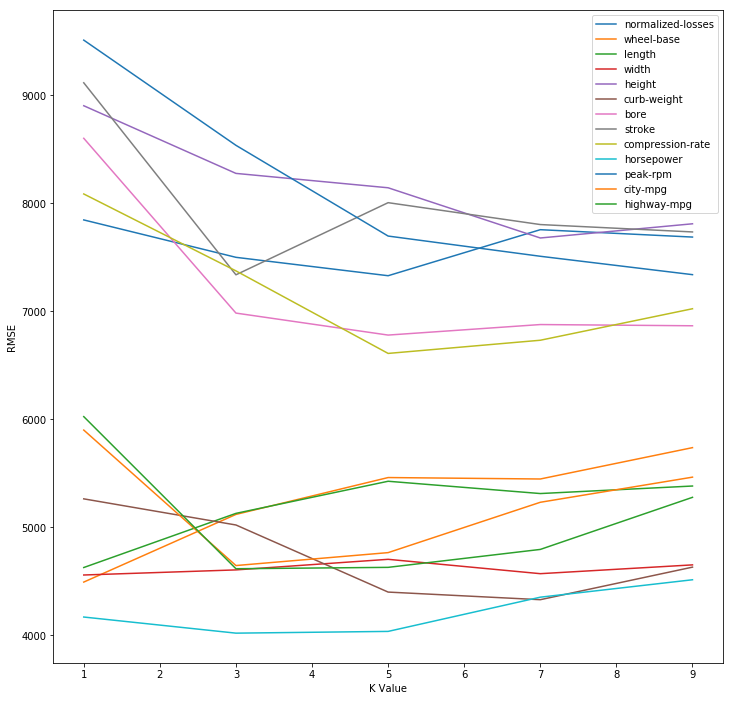

In [12]:
plt.figure(figsize = (12,12))
for feature, v in rmse_k_results.items():

    k_n = list(v.keys())
    rmse = list(v.values())
    
    plt.plot(k_n, rmse, label = feature)
    
    plt.xlabel('K Value')
    plt.ylabel('RMSE')

plt.legend()
plt.show()

Now, I will try to build a multivariate model. To do that, I have to sort which features are the best based on the graph above.

In [13]:
feature_avg_rmse = {}

for feature, v in rmse_k_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[feature] = avg_rmse

avg_rmse = pd.Series(feature_avg_rmse)
avg_rmse = avg_rmse.sort_values()
best_feat = list(avg_rmse.index)
best_feat

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'compression-rate',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

Now that I already know which features are the best, I can apply multiple features at once into the model.

In [14]:
def knn_model_3(dataset, features, target):
    
    knn = KNeighborsRegressor(n_neighbors = 5)
    
    np.random.seed(1)
    random_index = np.random.permutation(dataset.index)
    randomed_dataset = dataset.reindex(random_index)
    
    mid_idx = int(len(randomed_dataset) / 2)
    
    train_dataset = randomed_dataset[:mid_idx]
    test_dataset = randomed_dataset[mid_idx:]
    
    knn.fit(train_dataset[features], train_dataset[target])
    
    prediction = knn.predict(test_dataset[features])
    mse = mean_squared_error(test_dataset[target], prediction)
    rmse = mse**(0.5)
    
    return rmse

multiv_rmse ={}

best_two_features = best_feat[0:2]
best_three_features = best_feat[0:3]
best_four_features = best_feat[0:4]
best_five_features = best_feat[0:5]


multiv_rmse["best_two_rmse"]  = knn_model_3(normalized_cars, best_two_features, 'price')
multiv_rmse["best_three_rmse"] = knn_model_3(normalized_cars, best_three_features, 'price')
multiv_rmse["best_four_rmse"] = knn_model_3(normalized_cars, best_four_features, 'price')
multiv_rmse["best_five_rmse"] = knn_model_3(normalized_cars, best_five_features, 'price')
multiv_rmse

{'best_two_rmse': 3589.3132622073304,
 'best_three_rmse': 3305.9401397969677,
 'best_four_rmse': 3358.6915801682458,
 'best_five_rmse': 3665.546673045813}

Looks like using the best three, four or five features is the way to go. Now let's try changing the value of the neighbours K.

In [15]:
def knn_model_4(dataset, features, target, num_neighbors):
        
    np.random.seed(1)
    random_index = np.random.permutation(dataset.index)
    randomed_dataset = dataset.reindex(random_index)
    
    mid_idx = int(len(randomed_dataset) / 2)
    
    train_dataset = randomed_dataset[:mid_idx]
    test_dataset = randomed_dataset[mid_idx:]
    
    rmse_k = {}
    
    for k in num_neighbors:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_dataset[features], train_dataset[target])
    
        prediction = knn.predict(test_dataset[features])
        mse = mean_squared_error(test_dataset[target], prediction)
        rmse = mse**(0.5)
        rmse_k[k] = rmse
    
    return rmse_k

k_n = list(range(1,25))

multiv_k_rmse = {}

multiv_k_rmse["best_three_features"] = knn_model_4(normalized_cars, best_three_features, 'price', k_n)
multiv_k_rmse["best_four_features"] = knn_model_4(normalized_cars, best_four_features, 'price', k_n)
multiv_k_rmse["best_five_features"] = knn_model_4(normalized_cars, best_five_features, 'price', k_n)

multiv_k_rmse

{'best_three_features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868,
  16: 4394.4846551644205,
  17: 4510.399710057406,
  18: 4584.310961865486,
  19: 4636.62620477063,
  20: 4664.465847866811,
  21: 4724.096637428273,
  22: 4752.535484102914,
  23: 4808.703310452101,
  24: 4858.9452710176065},
 'best_four_features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.9

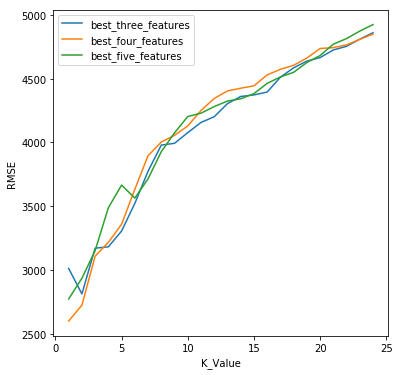

In [16]:
plt.figure(figsize=(6, 6))

for key, value in multiv_k_rmse.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label = key)
    plt.xlabel("K_Value")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()

From the chart above, we can see the most accurate model with the smallest RMSE is using the best four features with 1 nearest neighbors.

## Summary

For this dataset, the most accurate I can get by using KNN algorithm is when the features used are `horsepower`, `width`, `curb-weight` and `highway-mpg` and by using 1 as the number of nearest neighbors taken.

On later version I might try implementing cross validation to further improve this model.